In [3]:
import pandas as pd
import numpy as np 

uci_data = pd.read_csv('UCI_Heart_Disease.csv')
uci_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,NaN,0,NaN,1
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,NaN,0.0,NaN,0,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,NaN,0,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,NaN,0.0,NaN,0,NaN,0


In [4]:
print('--IDENTIFYING MISSING DATA AND ANALYZING MISSING DATA--')

--IDENTIFYING MISSING DATA AND ANALYZING MISSING DATA--


In [5]:
missing_data_info = uci_data.isnull().sum()
missing_data_pct = (missing_data_info / len(uci_data) * 100).round(2)
missing_data_summ = pd.DataFrame({
    'Missing_Count': missing_data_info,
    'Missing_Percentage': missing_data_info
})
print(missing_data_summ)

          Missing_Count  Missing_Percentage
id                    0                   0
age                   0                   0
sex                   0                   0
dataset               0                   0
cp                    0                   0
trestbps              0                   0
chol                  0                   0
fbs                  90                  90
restecg               2                   2
thalch                0                   0
exang                55                  55
oldpeak               0                   0
slope               309                 309
ca                    0                   0
thal                486                 486
num                   0                   0


In [6]:
# 'thal' column analysis
print(f"\nThal column value counts:")
print(uci_data['thal'].value_counts(dropna=False))


Thal column value counts:
thal
NaN                  486
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


In [7]:
# Handling of missing values
# Create missing indicators
uci_data['thal_missing'] = uci_data['thal'].isnull() | (uci_data['thal'].isin(['null', '', '?']))
uci_data['ca_missing'] = uci_data['ca'].isnull() | (uci_data['ca'].isin(['null', '', '?']))

In [8]:
# https://pmc.ncbi.nlm.nih.gov/articles/PMC4937666/ # Reference
# Clinical imputation
# Replace missing thal with the most common value ('normal' based on clinical knowledge)
most_common_thal = uci_data['thal'].mode()[0]
uci_data['thal'] = uci_data['thal'].fillna(most_common_thal)
uci_data['thal'] = uci_data['thal'].replace(['null', '', '?'], most_common_thal)

# Handle other missing values in columns 'ca' and 'slope'
for column in ['ca', 'slope']:
    if uci_data[column].isnull().sum() > 0:
        most_common = uci_data[column].mode()[0]
        uci_data[column] = uci_data[column].fillna(most_common)
        uci_data[column] = uci_data[column].replace(['null', '', '?'], most_common)

In [9]:
# Examine cleaned data
print(f"Rows retained: {len(uci_data)} (kept all your data)")
print(f"Missing values remaining: {uci_data.isnull().sum().sum()}")
print(f"New feature columns created: {sum(1 for col in uci_data.columns if '_missing' in col)}")

Rows retained: 920 (kept all your data)
Missing values remaining: 147
New feature columns created: 2


In [10]:
uci_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,flat,0,normal,1,True,False
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,NaN,0.0,flat,0,normal,0,True,False
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,flat,0,fixed defect,2,False,False
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,NaN,0.0,flat,0,normal,0,True,False


In [11]:
uci_data.to_csv('uci_data_cleaned.csv', index=False)

In [12]:
#147 missing values remain across the table... let's figure out what to do about that.
pd.read_csv('uci_data_cleaned.csv')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,flat,0,normal,1,True,False
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,NaN,0.0,flat,0,normal,0,True,False
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,flat,0,fixed defect,2,False,False
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,NaN,0.0,flat,0,normal,0,True,False


In [13]:
uci_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,flat,0,normal,1,True,False
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,NaN,0.0,flat,0,normal,0,True,False
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,flat,0,fixed defect,2,False,False
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,NaN,0.0,flat,0,normal,0,True,False


In [14]:
# Identifying columns with missing values
missing_by_column = uci_data.isnull().sum()
print("Missing values per column:")
print(missing_by_column[missing_by_column > 0])

Missing values per column:
fbs        90
restecg     2
exang      55
dtype: int64


In [15]:
import pandas as pd
import numpy as np


print(f"Starting with {uci_data.isnull().sum().sum()} missing values")

#Handle all possible missing value representations
missing_representations = [
    '', 'null', 'NULL', 'Null', 'none', 'None', 'NONE',
    'nan', 'NaN', 'NAN', 'n/a', 'N/A', 'na', 'NA',
    '-', '?', '??', 'unknown', 'Unknown', 'UNKNOWN'
]

# Replace all missing representations with NaN
for col in uci_data.columns:
    uci_data[col] = uci_data[col].replace(missing_representations, np.nan)
    
    # Handle whitespace-only values
    if uci_data[col].dtype == 'object':
        uci_data[col] = uci_data[col].apply(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

print(f"After standardizing: {uci_data.isnull().sum().sum()} missing values")

# Smart imputation by column type and clinical knowledge
print("\n=== IMPUTING MISSING VALUES ===")

# Numeric columns
numeric_columns = uci_data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if uci_data[col].isnull().sum() > 0:
        if col in ['age', 'trestbps', 'chol', 'thalach']:  # Continuous variables
            fill_value = uci_data[col].median()
        else:  # Discrete variables
            fill_value = uci_data[col].mode()[0]
        
        uci_data[col].fillna(fill_value, inplace=True)
        print(f" Filled {col}: {uci_data[col].isnull().sum()} -0 missing values")

# Categorical columns
categorical_columns = uci_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if uci_data[col].isnull().sum() > 0:
        if col == 'thal':
            # Based on European studies - 'normal' is most common
            fill_value = 'normal'
        else:
            # Use most common value for other categorical columns
            fill_value = uci_data[col].mode()[0] if len(uci_data[col].mode()) > 0 else 'unknown'
        
        uci_data[col].fillna(fill_value, inplace=True)
        print(f" Filled {col}: {uci_data[col].isnull().sum()} -0 missing values")

# Final verification
final_missing = uci_data.isnull().sum().sum()
print(f"\n FINAL RESULT: {final_missing} missing values remaining")

# Save the clean dataset
uci_data.to_csv('uci_heart_disease_perfect.csv', index=False)

Starting with 147 missing values
After standardizing: 147 missing values

=== IMPUTING MISSING VALUES ===
 Filled fbs: 0 -0 missing values
 Filled exang: 0 -0 missing values
 Filled restecg: 0 -0 missing values

 FINAL RESULT: 0 missing values remaining


C:\Users\Oniichan_11\AppData\Local\Temp\ipykernel_10140\2009318371.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uci_data[col].fillna(fill_value, inplace=True)
C:\Users\Oniichan_11\AppData\Local\Temp\ipykernel_10140\2009318371.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [16]:
uci_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,flat,0,normal,1,True,False
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,0.0,0.0,flat,0,normal,0,True,False
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,flat,0,fixed defect,2,False,False
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,0.0,0.0,flat,0,normal,0,True,False


# Model selection for training and testing on data
Based on `https://scikit-learn.org/stable/machine_learning_map.html` and the nature of our data-which is to classify patients as having heart disease(with various grades) or not, using `RandomForestClassifier` estimator is appropriate for the following reasons:

Handles mixed categorical/numerical features excellently

Provides interpretable feature importance rankings

Robust to outliers and missing data

Excellent for medical/healthcare datasets

Less prone to overfitting

Can capture non-linear relationships                                                                                                                                                                                                                                          

In [37]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.9 MB 1.3 MB/s eta 0:00:07
     ---------------------------------------- 0.0/8.9 MB 326.8 kB/s eta 0:00:28
     ---------------------------------------- 0.1/8.9 MB 435.7 kB/s eta 0:00:21
     ---------------------------------------- 0.1/8.9 MB 525.1 kB/s eta 0:00:17
      --------------------------------------- 0.1/8.9 MB 479.3 kB/s eta 0:00:19
     - -------------------------------------- 0.2/8.9 MB 765.3 kB/s eta 0:00:12
     - -------------------------------------- 0.2/8.9 MB 765.3 kB/s eta 0:00:12
     - -------------------------------------- 0.2/8.9 MB 765.3 kB/s eta 0:00:12
     - -------------------------------------- 0.3/8.9 MB 631.2 kB/s eta 0:00:14
     - -------------------------------------- 0.4/8.9 MB 791.2 kB/s eta 0:00:11
     - -------------------------------------- 0.4/8.9 MB 833


[notice] A new release of pip is available: 23.0.1 -> 26.0
[notice] To update, run: C:\Users\Oniichan_11\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
import sklearn

In [40]:
uci_data.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False


In [41]:
# Split data into X (independent variables) and y (dependent/outcome variable)
X = uci_data.drop(columns=['num', 'id'])
y = uci_data['num']

In [42]:
# Import train_test_split from sklearn's model_selection module to split data into training and test set
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((736, 16), (184, 16), (736,), (184,))

In [ ]:
# Ascertain whether all columns contain other data types than numerical
print("Data types in X:")
print(X.dtypes)
print(f"\nCategorical columns: {X.select_dtypes(include='object').columns.tolist()}")
print(f"Numerical columns: {X.select_dtypes(exclude='object').columns.tolist()}")

Data types in X:
age               int64
sex              object
dataset          object
cp               object
trestbps          int64
chol              int64
fbs             float64
restecg          object
thalch            int64
exang           float64
oldpeak         float64
slope            object
ca                int64
thal             object
thal_missing       bool
ca_missing         bool
dtype: object

Categorical columns: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
Numerical columns: ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'thal_missing', 'ca_missing']


In [ ]:
# Import various models to compare performance (with pre-processing to avoid value errors)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np

np.random.seed(42)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(exclude='object').columns.tolist()
print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

# Preprocessor for categorical column transformation and numerical scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline creation for each model (preprocessing + model) to integrate pre-processing into model training
models = {
    "Logistic Regression": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "K-Nearest Neighbors": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    "Decision Tree": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]),
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "Support Vector Machine": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ])
}

# Function creation for fitting and scoring models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

print("\n" + "="*60)
print("BASELINE MODEL COMPARISON RESULTS")
print("="*60)
for model_name, score in sorted(model_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name:.<40} {score:.4f} ({score*100:.2f}%)")

Categorical features: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
Numerical features: ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'thal_missing', 'ca_missing']

BASELINE MODEL COMPARISON RESULTS
Support Vector Machine.................. 0.8478 (84.78%)
Logistic Regression..................... 0.8370 (83.70%)
K-Nearest Neighbors..................... 0.8261 (82.61%)
Random Forest........................... 0.8152 (81.52%)
Decision Tree........................... 0.7826 (78.26%)


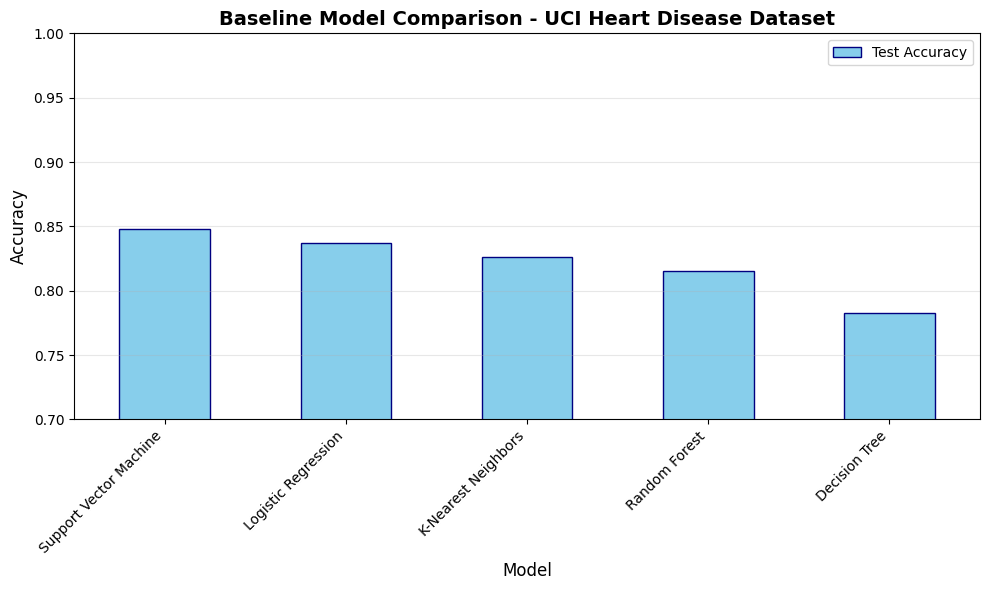


Best baseline model: Support Vector Machine
Best baseline accuracy: 0.8478


In [66]:
# Model comparison visualization
import matplotlib.pyplot as plt
import pandas as pd

model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.sort_values(by="Accuracy", ascending=False).plot.bar(
    figsize=(10, 6),
    color='skyblue',
    edgecolor='navy'
)
plt.title('Baseline Model Comparison - UCI Heart Disease Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim([0.7, 1.0])
plt.legend(['Test Accuracy'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nBest baseline model: {max(model_scores, key=model_scores.get)}")
print(f"Best baseline accuracy: {max(model_scores.values()):.4f}")

In [ ]:
#Shelving this as we have a multi-model evaluation approach to the project
#  # Importing the RandomForestClassifier from sklearn's ensemble module
# from sklearn.ensemble import RandomForestClassifier

# # Instantiate the RandomForestClassifier as model
# model = RandomForestClassifier(n_estimators = 100)

Exploring KNN hyperparameters...
  Tested k=5
  Tested k=10
  Tested k=15
  Tested k=20
  Tested k=25
  Tested k=30


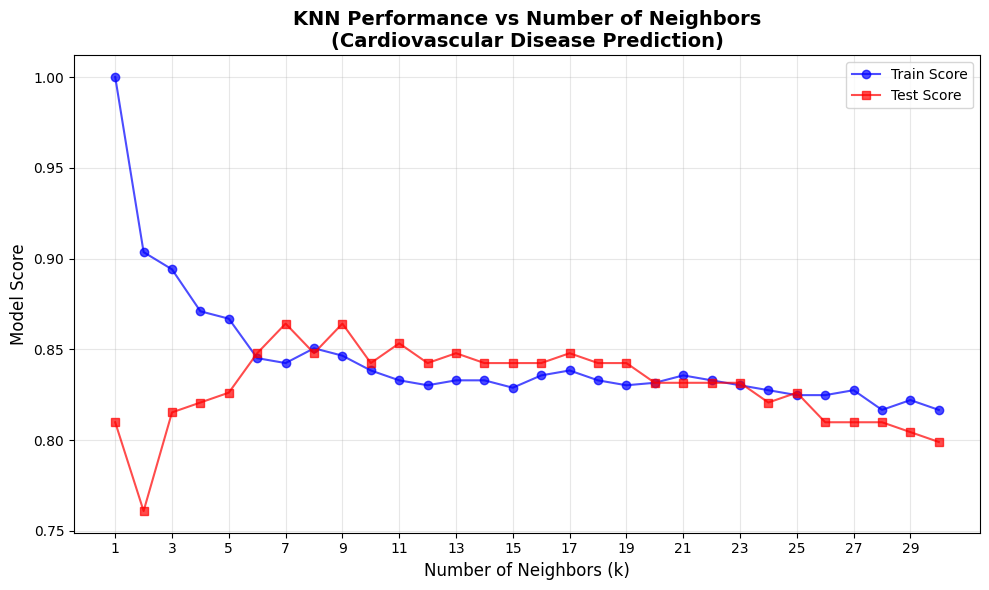


MANUAL HYPERPARAMETER TUNING RESULTS
Best k value: 7
Maximum test score: 0.8641 (86.41%)
Training score at best k: 0.8424


In [71]:
# Manual Hyperparameter tuning 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Create KNN pipeline with preprocessing
knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
train_scores = []
test_scores = []
neighbors = range(1, 31)

print("Exploring KNN hyperparameters...")
for i in neighbors:
    knn.set_params(classifier__n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

    if i % 5 == 0:  # Progress indicator
        print(f"  Tested k={i}")

# Results visualization
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label="Train Score", marker='o', color='blue', alpha=0.7)
plt.plot(neighbors, test_scores, label="Test Score", marker='s', color='red', alpha=0.7)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Model Score", fontsize=12)
plt.title("KNN Performance vs Number of Neighbors\n(Cardiovascular Disease Prediction)", 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(np.arange(1, 31, 2))
plt.tight_layout()
plt.show()

# Report best result
best_k = neighbors[np.argmax(test_scores)]
best_score = max(test_scores)

print("\n" + "="*60)
print("MANUAL HYPERPARAMETER TUNING RESULTS")
print("="*60)
print(f"Best k value: {best_k}")
print(f"Maximum test score: {best_score:.4f} ({best_score*100:.2f}%)")
print(f"Training score at best k: {train_scores[best_k-1]:.4f}")
print("="*60)

In [85]:
# Running to cross-validate on manually hypertuned KNN model

from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

knn_best = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=7))
])
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
# Cross-validation
print("Running 5-Fold Cross-Validation for KNN (k=7)...")
knn_cv_results = cross_validate(
    knn_best, 
    X_train, 
    y_train, 
    cv=5, 
    scoring=scoring,
    return_train_score=False
)
# Display results
print("\n" + "="*60)
print("KNN CROSS-VALIDATION RESULTS (5-Fold, k=7)")
print("="*60)
print(f"Accuracy:  {knn_cv_results['test_accuracy'].mean():.4f} ± {knn_cv_results['test_accuracy'].std():.4f}")
print(f"Precision: {knn_cv_results['test_precision'].mean():.4f} ± {knn_cv_results['test_precision'].std():.4f}")
print(f"Recall:    {knn_cv_results['test_recall'].mean():.4f} ± {knn_cv_results['test_recall'].std():.4f}")
print(f"F1-Score:  {knn_cv_results['test_f1'].mean():.4f} ± {knn_cv_results['test_f1'].std():.4f}")
print(f"ROC-AUC:   {knn_cv_results['test_roc_auc'].mean():.4f} ± {knn_cv_results['test_roc_auc'].std():.4f}")
print("="*60)
# Also get test set predictions for final comparison
knn_best.fit(X_train, y_train)
knn_y_pred = knn_best.predict(X_test)
knn_y_pred_proba = knn_best.predict_proba(X_test)[:, 1]

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_auc = roc_auc_score(y_test, knn_y_pred_proba)

print(f"\nKNN Final Test Set Results:")
print(f"Test Accuracy: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")
print(f"Test ROC-AUC:  {knn_auc:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, knn_y_pred))

Running 5-Fold Cross-Validation for KNN (k=7)...

KNN CROSS-VALIDATION RESULTS (5-Fold, k=7)
Accuracy:  0.8139 ± 0.0398
Precision: 0.8246 ± 0.0352
Recall:    0.8428 ± 0.0391
F1-Score:  0.8335 ± 0.0359
ROC-AUC:   0.8643 ± 0.0262

KNN Final Test Set Results:
Test Accuracy: 0.8641 (86.41%)
Test ROC-AUC:  0.8993

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        82
           1       0.85      0.92      0.88       102

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [ ]:
# # Building a pipeline to ensure the feeding of only numerical data into model

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from sklearn.pipeline import Pipeline

# # Defining the different categorical features with column indices over names
# categorical_indices = []
# numerical_indices = []
# categorical_names = []
# numerical_names = []

# for i, col in enumerate(X.columns):
#     if X[col].dtype == 'object':
#         categorical_indices.append(i)
#         categorical_names.append(col)
#     else:
#         numerical_indices.append(i)
#         numerical_names.append(col)

# # Alternative approach to identify column types
# categorical_cols = [col for col in uci_data.columns if uci_data[col].dtype == 'object' and col != 'num']
# numerical_cols = [col for col in uci_data.columns if uci_data[col].dtype != 'object' and col != 'num']

# print(f"Categorical columns: {categorical_cols}")
# print(f"Numerical columns: {numerical_cols}")

# print(f"Categorical columns (indices): {categorical_indices}")
# print(f"Categorical names: {categorical_names}")
# print(f"Numerical columns (indices): {numerical_indices}")
# print(f"Numerical names: {numerical_names}")

Categorical columns: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
Numerical columns: ['id', 'age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'thal_missing', 'ca_missing']
Categorical columns (indices): [1, 2, 3, 7, 11, 13]
Categorical names: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
Numerical columns (indices): [0, 4, 5, 6, 8, 9, 10, 12, 14, 15]
Numerical names: ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'thal_missing', 'ca_missing']


In [ ]:
# # Create preprocessor with column indices
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_indices),  # Scale numerical features
#         ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_indices)
#     ],
#     remainder='drop'
# )

# # Apply preprocessing
# X = uci_data.drop(columns=['num', 'id'])
# y = uci_data['num']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Fit the model to the training data

# # But first, apply the pipeline preprocessor to the X_train and X_test data with categorical values
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

# # Go on to fit model on transformed X_train with y_train
# model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# # Score model on test data
# model.score(X_test, y_test)

C:\Users\Oniichan_11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Male'

In [73]:
# Convert to binary classification
# "Converting multi-class to binary classification" for y ('num' values)

# Original: 0=no disease, 1,2,3,4=different phenotypes of chest pain(anginal and non-anginal), informing on disease type
# Convert to: 0=no disease, 1=disease present
y_binary = (y > 0).astype(int)


print("Binary target distribution:")
print(y_binary.value_counts())

# Calculate class balance
no_disease = (y_binary == 0).sum()
disease = (y_binary == 1).sum()
print(f"No disease (0): {no_disease} ({no_disease/len(y_binary)*100:.1f}%)")
print(f"Disease (1): {disease} ({disease/len(y_binary)*100:.1f}%)")

y = y_binary 
# Create train-test split with binary target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binary
)

print(f"✅  train set: {X_train.shape}")
print(f"✅  test set: {X_test.shape}")

Binary target distribution:
num
1    509
0    411
Name: count, dtype: int64
No disease (0): 411 (44.7%)
Disease (1): 509 (55.3%)
✅  train set: (736, 16)
✅  test set: (184, 16)


In [80]:
# Pipeline creation with preprocessor for svm.SVC() model improvement
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True,random_state=42))
])  #svm is support vector machine

svm_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Essential for Regularization strength
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # The Kernel coefficient
    'classifier__degree': [2, 3, 4],  # Degree for polynomial kernel
    'classifier__class_weight': [None, 'balanced']  # Handles class imbalance
}


svm_rsearch = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=svm_param_grid,
    n_iter=50,  # Subject to adjustments
    cv=5,
    scoring='roc_auc',  
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nStarting classification hyperparameter tuning...")
svm_rsearch.fit(X_train, y_train)

print(f"Best ROC-AUC: {svm_rsearch.best_score_:.4f}")
print(f"Best parameters: {svm_rsearch.best_params_}")

# Final evaluation
svm_best_model = svm_rsearch.best_estimator_
svm_y_pred = svm_best_model.predict(X_test)
svm_y_pred_proba = svm_best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_auc = roc_auc_score(y_test, svm_y_pred_proba)

print(f"\nFinal Classification Results:")
print(f"Test Accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"Test ROC-AUC: {svm_auc:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, svm_y_pred))


Starting classification hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best ROC-AUC: 0.8986
Best parameters: {'classifier__kernel': 'linear', 'classifier__gamma': 0.01, 'classifier__degree': 4, 'classifier__class_weight': None, 'classifier__C': 1}

Final Classification Results:
Test Accuracy: 0.8370 (83.70%)
Test ROC-AUC: 0.9207

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



Calculating cross-validated metrics...
This may take a moment...

CROSS-VALIDATION RESULTS (5-Fold)
Accuracy:  0.7924 ± 0.1027
Precision: 0.8300 ± 0.1200
Recall:    0.8289 ± 0.1380
F1-Score:  0.8162 ± 0.0874
ROC-AUC:   0.8862 ± 0.0721


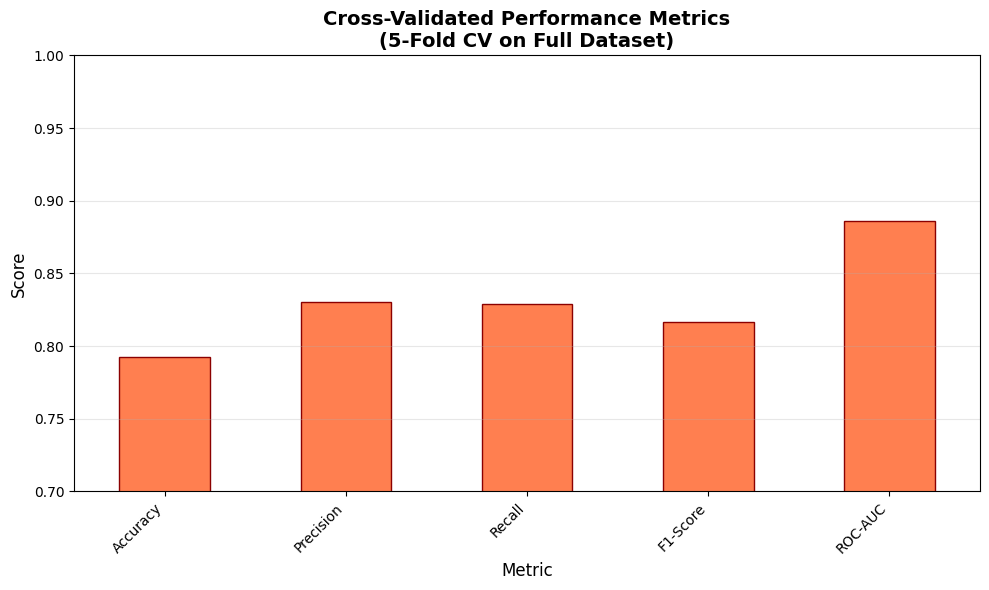

In [81]:
# Validate model performance stability

from sklearn.model_selection import cross_val_score

print("Calculating cross-validated metrics...")
print("This may take a moment...\n")

# Cross-validated metrics
svm_cv_acc = cross_val_score(svm_best_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
svm_cv_precision = cross_val_score(svm_best_model, X, y, cv=5, scoring='precision', n_jobs=-1)
svm_cv_recall = cross_val_score(svm_best_model, X, y, cv=5, scoring='recall', n_jobs=-1)
svm_cv_f1 = cross_val_score(svm_best_model, X, y, cv=5, scoring='f1', n_jobs=-1)
svm_cv_roc_auc = cross_val_score(svm_best_model, X, y, cv=5, scoring='roc_auc', n_jobs=-1)

print("="*60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("="*60)
print(f"Accuracy:  {svm_cv_acc.mean():.4f} ± {svm_cv_acc.std():.4f}")
print(f"Precision: {svm_cv_precision.mean():.4f} ± {svm_cv_precision.std():.4f}")
print(f"Recall:    {svm_cv_recall.mean():.4f} ± {svm_cv_recall.std():.4f}")
print(f"F1-Score:  {svm_cv_f1.mean():.4f} ± {svm_cv_f1.std():.4f}")
print(f"ROC-AUC:   {svm_cv_roc_auc.mean():.4f} ± {svm_cv_roc_auc.std():.4f}")
print("="*60)

# Visualize CV metrics
svm_cv_metrics = pd.DataFrame({
    "Accuracy": svm_cv_acc.mean(),
    "Precision": svm_cv_precision.mean(),
    "Recall": svm_cv_recall.mean(),
    "F1-Score": svm_cv_f1.mean(),
    "ROC-AUC": svm_cv_roc_auc.mean()
}, index=[0])

svm_cv_metrics.T.plot.bar(
    figsize=(10, 6),
    color='coral',
    edgecolor='darkred',
    legend=False
)
plt.title('Cross-Validated Performance Metrics\n(5-Fold CV on Full Dataset)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim([0.7, 1.0])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [78]:
# Pipeline creation with preprocessor for LogisticRegression() model improvement
# LOGISTIC REGRESSION HYPERPARAMETER GRID
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
]) 

log_reg_param_grid = {
    'classifier__C': np.logspace(-4, 4, 20),  # 20 values between 10^-4 and 10^4
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Optimization algorithms
    'classifier__max_iter': [100, 200, 500, 1000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']  # Ensures handling of class imbalance
}

# Use RandomizedSearchCV
log_reg_rsearch = RandomizedSearchCV(
    estimator=log_reg_pipeline,
    param_distributions=log_reg_param_grid,
    n_iter=50,  # Test 50 combinations
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("HYPERPARAMETER TUNING: LOGISTIC REGRESSION")


log_reg_rsearch.fit(X_train, y_train)

print(f"\nBest ROC-AUC: {log_reg_rsearch.best_score_:.4f}")
print(f"Best parameters: {log_reg_rsearch.best_params_}")

# Evaluate on test set
log_reg_best_model = log_reg_rsearch.best_estimator_
log_reg_y_pred = log_reg_best_model.predict(X_test)
log_reg_y_pred_proba = log_reg_best_model.predict_proba(X_test)[:, 1]

log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_auc = roc_auc_score(y_test, log_reg_y_pred_proba)

print(f"\nLogistic Regression Final Classification Results:")
print(f"Test Accuracy: {log_reg_accuracy:.4f} ({log_reg_accuracy*100:.2f}%)")
print(f"Test ROC-AUC: {log_reg_auc:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, log_reg_y_pred))

HYPERPARAMETER TUNING: LOGISTIC REGRESSION
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Oniichan_11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Oniichan_11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Oniichan_11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Lo


Best ROC-AUC: 0.8981
Best parameters: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__max_iter': 200, 'classifier__class_weight': None, 'classifier__C': np.float64(4.281332398719396)}

Logistic Regression Final Classification Results:
Test Accuracy: 0.8424 (84.24%)
Test ROC-AUC: 0.9229

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        82
           1       0.83      0.90      0.86       102

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Calculating cross-validated metrics...
This may take a moment...

CROSS-VALIDATION RESULTS (5-Fold)
Accuracy:  0.7902 ± 0.1107
Precision: 0.8278 ± 0.1275
Recall:    0.8309 ± 0.1362
F1-Score:  0.8161 ± 0.0916
ROC-AUC:   0.8835 ± 0.0779


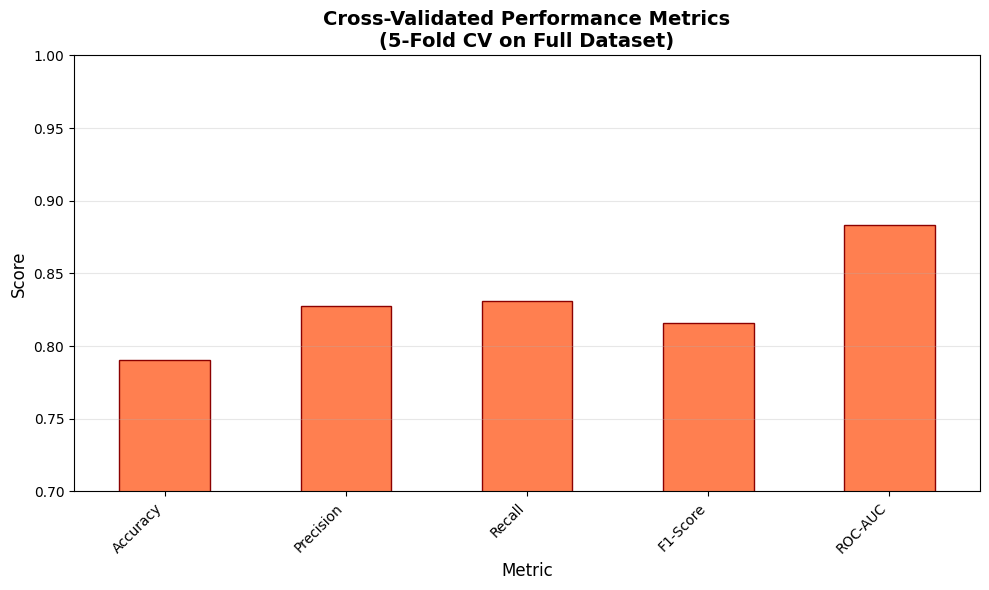

In [82]:
# Validate model performance stability

from sklearn.model_selection import cross_val_score

print("Calculating cross-validated metrics...")
print("This may take a moment...\n")

# Cross-validated metrics
log_reg_cv_acc = cross_val_score(log_reg_best_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_cv_precision = cross_val_score(log_reg_best_model, X, y, cv=5, scoring='precision', n_jobs=-1)
log_reg_cv_recall = cross_val_score(log_reg_best_model, X, y, cv=5, scoring='recall', n_jobs=-1)
log_reg_cv_f1 = cross_val_score(log_reg_best_model, X, y, cv=5, scoring='f1', n_jobs=-1)
log_reg_cv_roc_auc = cross_val_score(log_reg_best_model, X, y, cv=5, scoring='roc_auc', n_jobs=-1)

print("="*60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("="*60)
print(f"Accuracy:  {log_reg_cv_acc.mean():.4f} ± {log_reg_cv_acc.std():.4f}")
print(f"Precision: {log_reg_cv_precision.mean():.4f} ± {log_reg_cv_precision.std():.4f}")
print(f"Recall:    {log_reg_cv_recall.mean():.4f} ± {log_reg_cv_recall.std():.4f}")
print(f"F1-Score:  {log_reg_cv_f1.mean():.4f} ± {log_reg_cv_f1.std():.4f}")
print(f"ROC-AUC:   {log_reg_cv_roc_auc.mean():.4f} ± {log_reg_cv_roc_auc.std():.4f}")
print("="*60)

# Visualize CV metrics
log_reg_cv_metrics = pd.DataFrame({
    "Accuracy": log_reg_cv_acc.mean(),
    "Precision": log_reg_cv_precision.mean(),
    "Recall": log_reg_cv_recall.mean(),
    "F1-Score": log_reg_cv_f1.mean(),
    "ROC-AUC": log_reg_cv_roc_auc.mean()
}, index=[0])

log_reg_cv_metrics.T.plot.bar(
    figsize=(10, 6),
    color='coral',
    edgecolor='darkred',
    legend=False
)
plt.title('Cross-Validated Performance Metrics\n(5-Fold CV on Full Dataset)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim([0.7, 1.0])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Calculating cross-validated metrics...
This may take a moment...

CROSS-VALIDATION RESULTS (5-Fold)
Accuracy:  0.7598 ± 0.0881
Precision: 0.7908 ± 0.1010
Recall:    0.8092 ± 0.1637
F1-Score:  0.7848 ± 0.0858
ROC-AUC:   0.8324 ± 0.0934


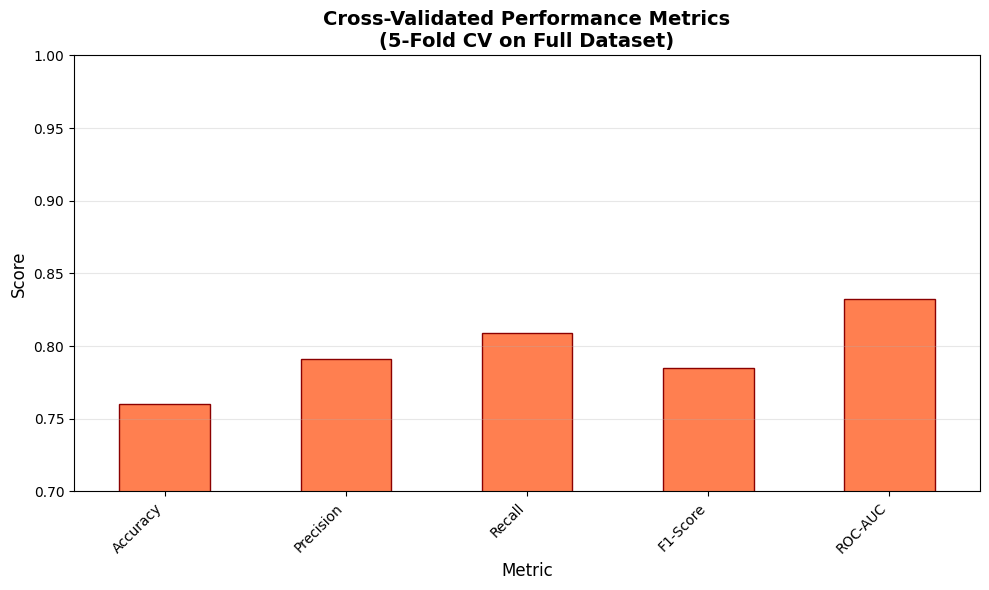

In [86]:
# Model performance stability validation with cross-validation
from sklearn.model_selection import cross_val_score

print("Calculating cross-validated metrics...")
print("This may take a moment...\n")

# Cross-validated metrics
cv_acc = cross_val_score(best_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
cv_precision = cross_val_score(best_model, X, y, cv=5, scoring='precision', n_jobs=-1)
cv_recall = cross_val_score(best_model, X, y, cv=5, scoring='recall', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X, y, cv=5, scoring='f1', n_jobs=-1)
cv_roc_auc = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc', n_jobs=-1)

print("="*60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("="*60)
print(f"Accuracy:  {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall:    {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1-Score:  {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"ROC-AUC:   {cv_roc_auc.mean():.4f} ± {cv_roc_auc.std():.4f}")
print("="*60)

# Visualize CV metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc.mean(),
    "Precision": cv_precision.mean(),
    "Recall": cv_recall.mean(),
    "F1-Score": cv_f1.mean(),
    "ROC-AUC": cv_roc_auc.mean()
}, index=[0])

cv_metrics.T.plot.bar(
    figsize=(10, 6),
    color='coral',
    edgecolor='darkred',
    legend=False
)
plt.title('Cross-Validated Performance Metrics\n(5-Fold CV on Full Dataset)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim([0.7, 1.0])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# # Obtain optimized model
# best_model = rsearch.best_estimator_

# print(f"Best parameters: {rsearch.best_params_}")
# print(f"Best CV ROC-AUC score: {rsearch.best_score_:.4f}")

# #Final model evaluation on test set
# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score, f1_score,
#     roc_auc_score, confusion_matrix, classification_report
# )

# print("\n TEST SET PERFORMANCE:")
# print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
# print(f"Precision: {precision_score(y_test, y_pred):.4f}")
# print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
# print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
# print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")

# print("\n DETAILED CLASSIFICATION REPORT:")
# print(classification_report(y_test, y_pred, 
#                           target_names=['No Disease', 'Disease']))

# print("\n CONFUSION MATRIX:")
# cm = confusion_matrix(y_test, y_pred)
# print(f"True Negatives (correctly predicted no disease): {cm[0,0]}")
# print(f"False Positives (incorrectly predicted disease): {cm[0,1]}")
# print(f"False Negatives (missed disease cases): {cm[1,0]}")
# print(f"True Positives (correctly predicted disease): {cm[1,1]}")

Best parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10, 'classifier__bootstrap': False}
Best CV ROC-AUC score: 0.8908

 TEST SET PERFORMANCE:
Accuracy:  0.8370
Precision: 0.8396
Recall:    0.8725
F1-Score:  0.8558
ROC-AUC:   0.9201

 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

  No Disease       0.83      0.79      0.81        82
     Disease       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184


 CONFUSION MATRIX:
True Negatives (correctly predicted no disease): 65
False Positives (incorrectly predicted disease): 17
False Negatives (missed disease cases): 13
True Positives (correctly predicted disease): 89


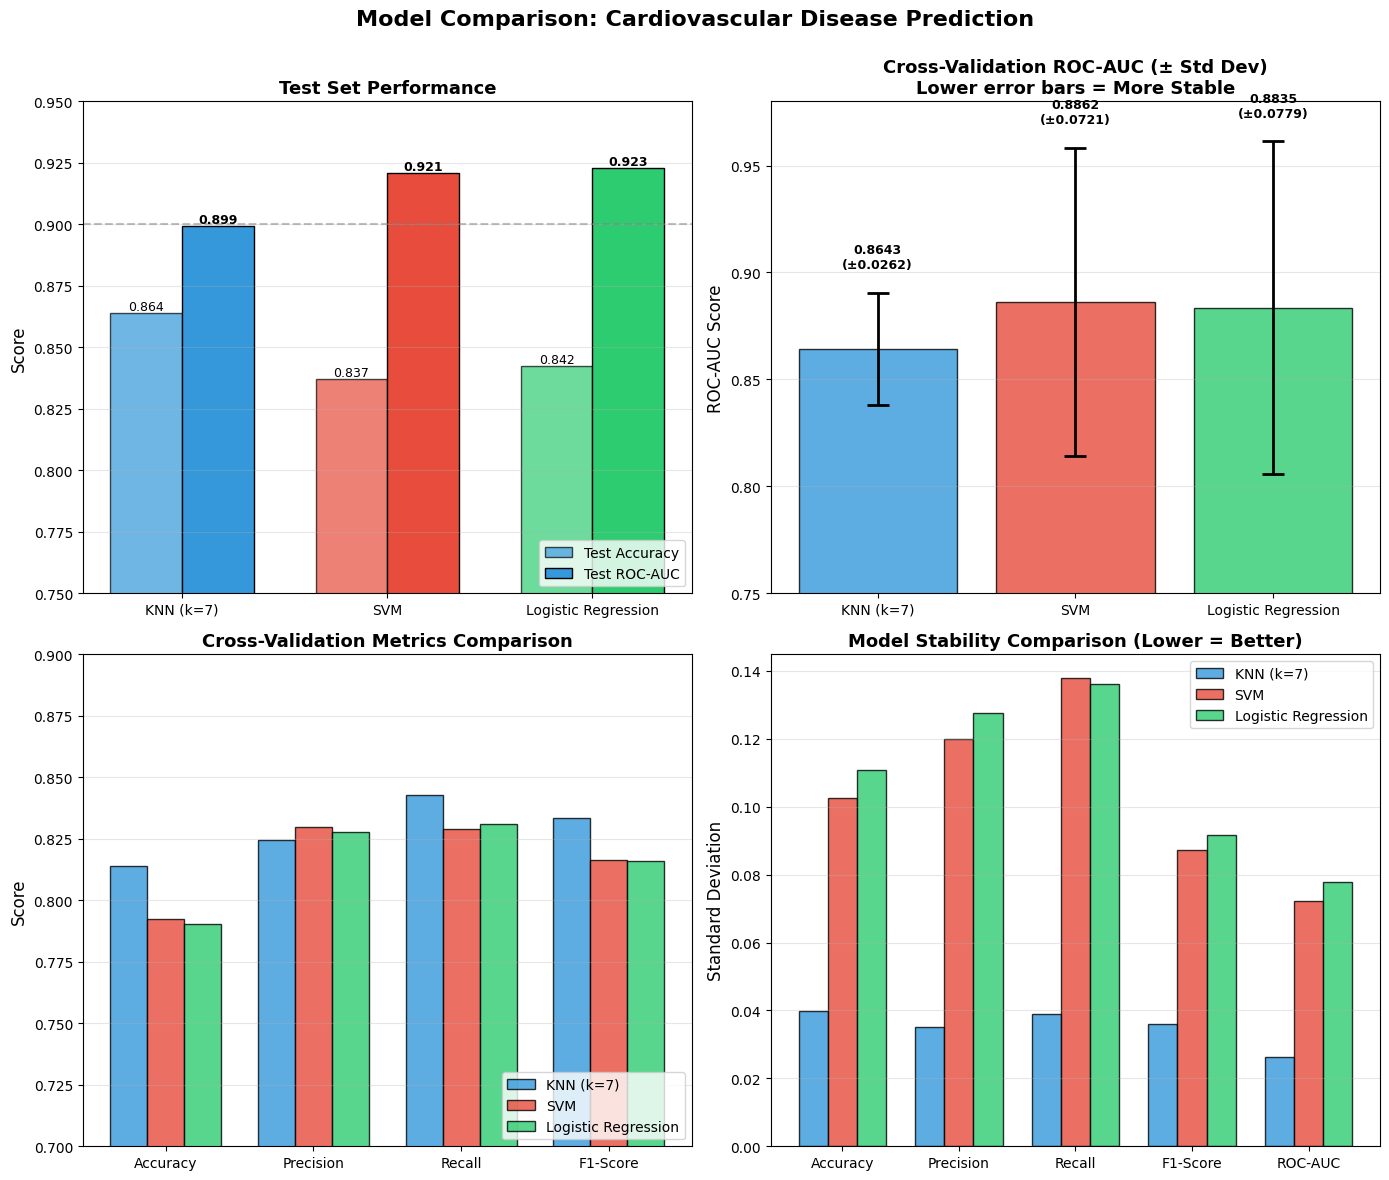

In [88]:
# Comparison of evaluation models of the 3 models tested: KNN, SVM, and LogisticRegression
comparison_data = {
    'Model': ['KNN (k=7)', 'SVM', 'Logistic Regression'],
    'Test Accuracy': [0.8641, 0.8370, 0.8424],
    'Test ROC-AUC': [0.8993, 0.9207, 0.9229],
    'CV Accuracy': [0.8139, 0.7924, 0.7902],
    'CV Accuracy Std': [0.0398, 0.1027, 0.1107],
    'CV Precision': [0.8246, 0.8300, 0.8278],
    'CV Precision Std': [0.0352, 0.1200, 0.1275],
    'CV Recall': [0.8428, 0.8289, 0.8309],
    'CV Recall Std': [0.0391, 0.1380, 0.1362],
    'CV F1-Score': [0.8335, 0.8162, 0.8161],
    'CV F1 Std': [0.0359, 0.0874, 0.0916],
    'CV ROC-AUC': [0.8643, 0.8862, 0.8835],
    'CV ROC-AUC Std': [0.0262, 0.0721, 0.0779]
}
df_comparison = pd.DataFrame(comparison_data)
df_comparison

# Visualization of various evaluation metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Model Comparison: Cardiovascular Disease Prediction\n', 
             fontsize=16, fontweight='bold')

colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green
models = ['KNN (k=7)', 'SVM', 'Logistic Regression']

# Performance of models/estimators on test set (Accuracy vs ROC-AUC)
ax1 = axes[0, 0]
x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, df_comparison['Test Accuracy'], width, 
                label='Test Accuracy', color=colors, alpha=0.7, edgecolor='black')
bars2 = ax1.bar(x + width/2, df_comparison['Test ROC-AUC'], width, 
                label='Test ROC-AUC', color=colors, alpha=1.0, edgecolor='black')

ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('Test Set Performance', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, fontsize=10)
ax1.legend(loc='lower right')
ax1.set_ylim(0.75, 0.95)
ax1.axhline(y=0.9, color='gray', linestyle='--', alpha=0.5, label='0.90 threshold')
ax1.grid(axis='y', alpha=0.3)
# Add value labels
for bar in bars1:
    ax1.annotate(f'{bar.get_height():.3f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha='center', va='bottom', fontsize=9)
for bar in bars2:
    ax1.annotate(f'{bar.get_height():.3f}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

# ROC-AUC Cross-validation with error bars
ax2 = axes[0, 1]
x_pos = np.arange(len(models))

bars = ax2.bar(x_pos, df_comparison['CV ROC-AUC'], 
               yerr=df_comparison['CV ROC-AUC Std'],
               color=colors, alpha=0.8, edgecolor='black', capsize=8, 
               error_kw={'linewidth': 2, 'capthick': 2})

ax2.set_ylabel('ROC-AUC Score', fontsize=12)
ax2.set_title('Cross-Validation ROC-AUC (± Std Dev)\nLower error bars = More Stable', 
              fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models, fontsize=10)
ax2.set_ylim(0.75, 0.98)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, std) in enumerate(zip(bars, df_comparison['CV ROC-AUC Std'])):
    ax2.annotate(f'{bar.get_height():.4f}\n(±{std:.4f})', 
                 xy=(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.01),
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

# cv metrics comparison across the three models
ax3 = axes[1, 0]
metrics = ['CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1-Score']
x = np.arange(len(metrics))
width = 0.25

for i, (model, color) in enumerate(zip(models, colors)):
    values = df_comparison[df_comparison['Model'] == model][metrics].values.flatten()
    ax3.bar(x + i*width, values, width, label=model, color=color, alpha=0.8, edgecolor='black')

ax3.set_ylabel('Score', fontsize=12)
ax3.set_title('Cross-Validation Metrics Comparison', fontsize=13, fontweight='bold')
ax3.set_xticks(x + width)
ax3.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score'], fontsize=10)
ax3.legend(loc='lower right')
ax3.set_ylim(0.70, 0.90)
ax3.grid(axis='y', alpha=0.3)

# Visualization of standard deviations (function of model stabiloty)
ax4 = axes[1, 1]
std_metrics = ['CV Accuracy Std', 'CV Precision Std', 'CV Recall Std', 'CV F1 Std', 'CV ROC-AUC Std']
std_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(std_labels))
width = 0.25

for i, (model, color) in enumerate(zip(models, colors)):
    values = df_comparison[df_comparison['Model'] == model][std_metrics].values.flatten()
    ax4.bar(x + i*width, values, width, label=model, color=color, alpha=0.8, edgecolor='black')

ax4.set_ylabel('Standard Deviation', fontsize=12)
ax4.set_title('Model Stability Comparison (Lower = Better)', fontsize=13, fontweight='bold')
ax4.set_xticks(x + width)
ax4.set_xticklabels(std_labels, fontsize=10)
ax4.legend(loc='upper right')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [92]:
 # 3. SUMMARY CONCLUSION
# ============================================================

print("FINAL MODEL SELECTION SUMMARY")

print(""" WHY LOGISTIC REGRESSION?                             

  ✓ HIGHEST TEST ROC-AUC of 0.9229                                          
    → Best discriminative ability for CVD risk ranking                       
    → Critical for medical screening applications                            
                                                                             
  ✓ INTERPRETABILITY                                                         
    → Feature coefficients explain risk factors                              
    → Essential for health policy recommendations                            
    → Clinicians can understand and trust the model                          
                                                                             
  ✓ COMPARABLE CV PERFORMANCE                                                
    → CV ROC-AUC: 0.8835 which is competitive with SVM's 0.8862                   
    → Balanced precision/recall tradeoff                                     

  ✓ CLINICAL DEPLOYMENT                                                      
   → Lightweight, fast predictions                                          
    → Probability outputs for risk stratification                            
    → Widely accepted in healthcare ML                                       

NOTE: KNN showed higher stability due to lower std but lacks interpretability   
 and has lower ROC-AUC—less suitable for healthcare decision support.       """)

print(f"SELECTED MODEL: Logistic Regression")
print(f"Test ROC-AUC:   0.9229")
print(f"Test Accuracy:  84.24%")

FINAL MODEL SELECTION SUMMARY
 WHY LOGISTIC REGRESSION?                             

 ✓ HIGHEST TEST ROC-AUC of 0.9229                                          
   → Best discriminative ability for CVD risk ranking                       
   → Critical for medical screening applications                            
                                                                            
 ✓ INTERPRETABILITY                                                         
   → Feature coefficients explain risk factors                              
   → Essential for health policy recommendations                            
   → Clinicians can understand and trust the model                          
                                                                            
 ✓ COMPARABLE CV PERFORMANCE                                                
   → CV ROC-AUC: 0.8835 which is competitive with SVM's 0.8862                   
   → Balanced precision/recall tradeoff                        

BEST MODEL: LOGISTIC REGRESSION
Optimal Hyperparameters (from RandomizedSearchCV):
  • Solver:       liblinear
  • Penalty:      L1 (Lasso regularization)
  • C:            4.2813 (inverse regularization strength)
  • Max Iter:     200
  • Class Weight: None


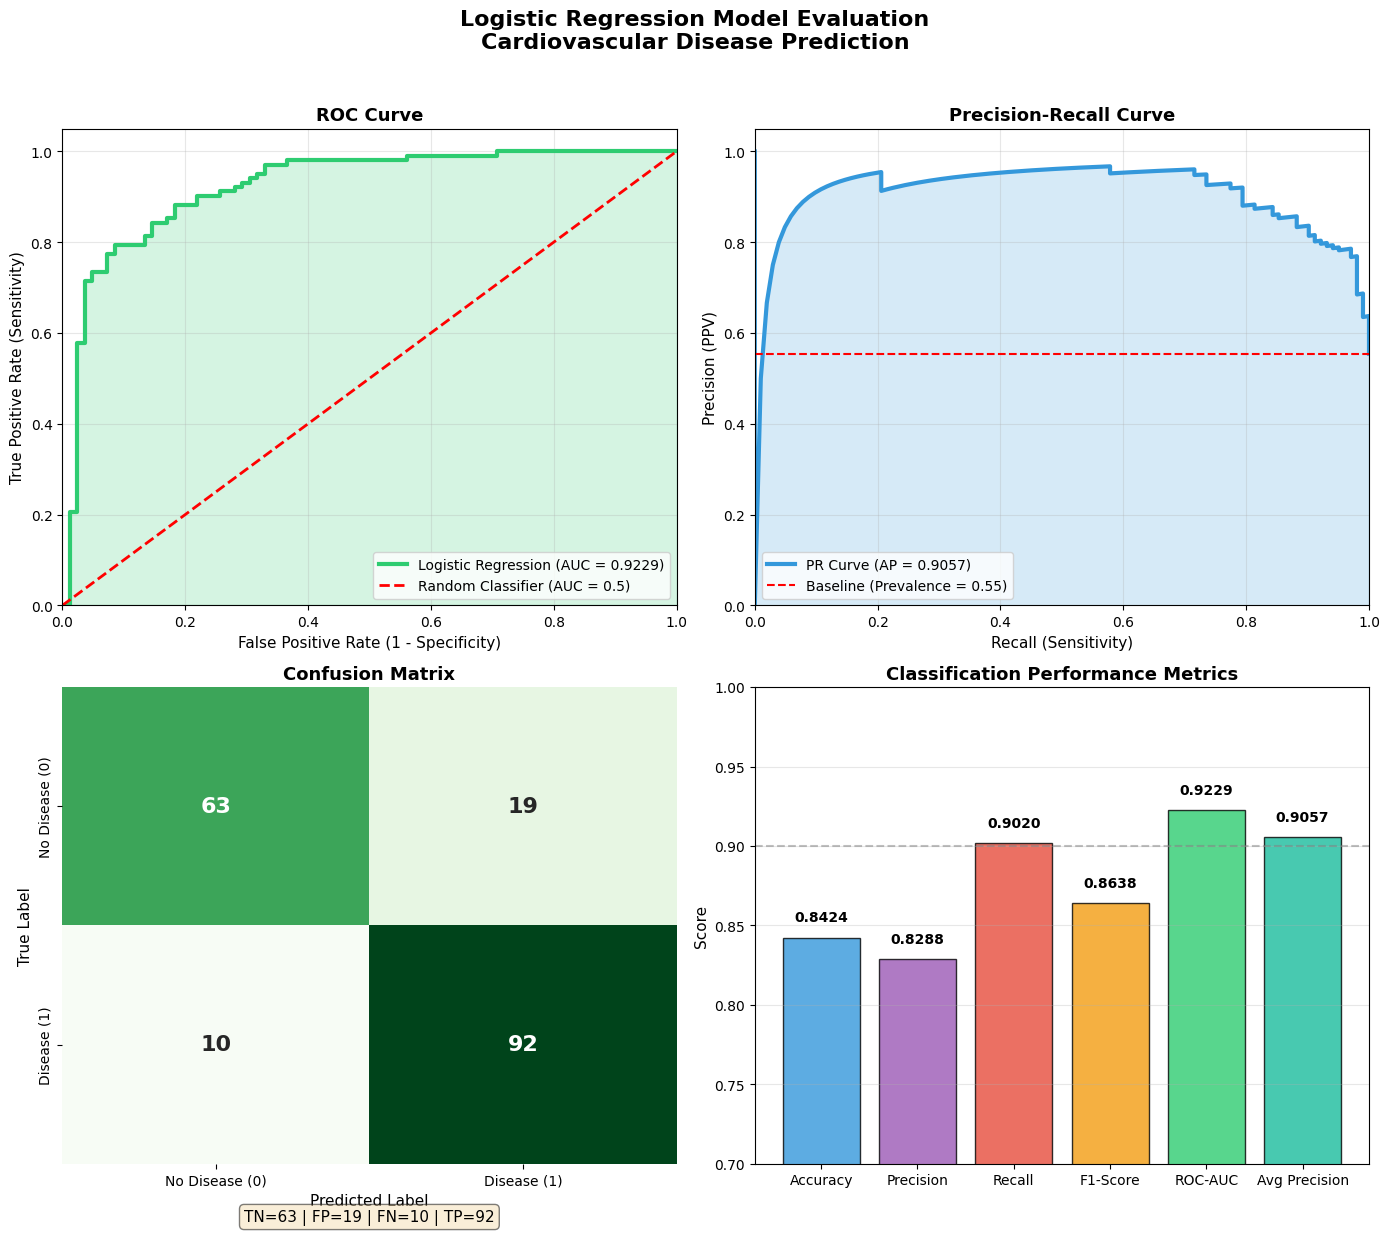


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

  No Disease     0.8630    0.7683    0.8129        82
     Disease     0.8288    0.9020    0.8638       102

    accuracy                         0.8424       184
   macro avg     0.8459    0.8351    0.8384       184
weighted avg     0.8441    0.8424    0.8411       184


CLINICAL INTERPRETATION

            CONFUSION MATRIX BREAKDOWN            
----------------------------------------------------------------------
True Negatives  (Correctly ruled out disease):    63 patients
False Positives (Healthy misclassified as sick):  19 patients
False Negatives (Missed disease cases):           10 patients ⚠️
True Positives  (Correctly identified disease):   92 patients

           CLINICAL PERFORMANCE METRICS           
----------------------------------------------------------------------
Sensitivity (Recall):     90.20%  → Detects 92 of 102 disease cases
Specificity:              76.83%  → Correctly rules

In [93]:
# ROC Curve and Comprehensive Evaluation for Best Model (Logistic Regression)
# Using best parameters from RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_curve, roc_auc_score, 
    precision_recall_curve, average_precision_score,
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns


# Creating the best model with the best parameters
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        solver='liblinear',
        penalty='l1',
        max_iter=200,
        class_weight=None,
        C=4.281332398719396,
        random_state=42
    ))
])

# Fit on training data
best_model.fit(X_train, y_train)

print("="*70)
print("BEST MODEL: LOGISTIC REGRESSION")
print("="*70)
print("Optimal Hyperparameters (from RandomizedSearchCV):")
print(f"  • Solver:       liblinear")
print(f"  • Penalty:      L1 (Lasso regularization)")
print(f"  • C:            4.2813 (inverse regularization strength)")
print(f"  • Max Iter:     200")
print(f"  • Class Weight: None")
print("="*70)


# GET PREDICTIONS
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


# CALCULATE EVALUATION METRICS
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)


# CREATE COMPREHENSIVE EVALUATION FIGURE

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Logistic Regression Model Evaluation\nCardiovascular Disease Prediction', 
             fontsize=16, fontweight='bold', y=1.02)


# Plot 1: ROC Curve
axes[0, 0].plot(fpr, tpr, color='#2ecc71', lw=3, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
axes[0, 0].fill_between(fpr, tpr, alpha=0.2, color='#2ecc71')
axes[0, 0].set_xlabel('False Positive Rate (1 - Specificity)', fontsize=11)
axes[0, 0].set_ylabel('True Positive Rate (Sensitivity)', fontsize=11)
axes[0, 0].set_title('ROC Curve', fontsize=13, fontweight='bold')
axes[0, 0].legend(loc='lower right', fontsize=10)
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_xlim([0, 1])
axes[0, 0].set_ylim([0, 1.05])


# Plot 2: Precision-Recall Curve
axes[0, 1].plot(recall_vals, precision_vals, color='#3498db', lw=3, 
                label=f'PR Curve (AP = {avg_precision:.4f})')
axes[0, 1].fill_between(recall_vals, precision_vals, alpha=0.2, color='#3498db')
axes[0, 1].axhline(y=sum(y_test)/len(y_test), color='red', linestyle='--', 
                   label=f'Baseline (Prevalence = {sum(y_test)/len(y_test):.2f})')
axes[0, 1].set_xlabel('Recall (Sensitivity)', fontsize=11)
axes[0, 1].set_ylabel('Precision (PPV)', fontsize=11)
axes[0, 1].set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
axes[0, 1].legend(loc='lower left', fontsize=10)
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xlim([0, 1])
axes[0, 1].set_ylim([0, 1.05])


# Plot 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0], cbar=False,
            annot_kws={'size': 16, 'weight': 'bold'},
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
axes[1, 0].set_xlabel('Predicted Label', fontsize=11)
axes[1, 0].set_ylabel('True Label', fontsize=11)
axes[1, 0].set_title('Confusion Matrix', fontsize=13, fontweight='bold')

tn, fp, fn, tp = cm.ravel()
axes[1, 0].text(0.5, -0.12, 
                f'TN={tn} | FP={fp} | FN={fn} | TP={tp}',
                ha='center', transform=axes[1, 0].transAxes, fontsize=11,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


# Plot 4: Classification Metrics Bar Chart
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc,
    'Avg Precision': avg_precision
}

colors = ['#3498db', '#9b59b6', '#e74c3c', '#f39c12', '#2ecc71', '#1abc9c']
bars = axes[1, 1].bar(metrics.keys(), metrics.values(), color=colors, alpha=0.8, edgecolor='black')
axes[1, 1].set_ylabel('Score', fontsize=11)
axes[1, 1].set_title('Classification Performance Metrics', fontsize=13, fontweight='bold')
axes[1, 1].set_ylim([0.70, 1.0])
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].axhline(y=0.9, color='gray', linestyle='--', alpha=0.5)

for bar, value in zip(bars, metrics.values()):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, value + 0.01, 
                    f'{value:.4f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('logistic_regression_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

# DETAILED CLASSIFICATION REPORT
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred, 
                          target_names=['No Disease', 'Disease'],
                          digits=4))


# CLINICAL INTERPRETATION
specificity = tn / (tn + fp)
npv = tn / (tn + fn)  # Negative Predictive Value
ppv = tp / (tp + fp)  # Positive Predictive Value (Precision)

print("\n" + "="*70)
print("CLINICAL INTERPRETATION")
print("="*70)
print(f"\n{'CONFUSION MATRIX BREAKDOWN':^50}")
print("-"*70)
print(f"True Negatives  (Correctly ruled out disease):   {tn:>3} patients")
print(f"False Positives (Healthy misclassified as sick): {fp:>3} patients")
print(f"False Negatives (Missed disease cases):          {fn:>3} patients ⚠️")
print(f"True Positives  (Correctly identified disease):  {tp:>3} patients")

print(f"\n{'CLINICAL PERFORMANCE METRICS':^50}")
print("-"*70)
print(f"Sensitivity (Recall):     {recall_score(y_test, y_pred):.2%}  → Detects {tp} of {tp+fn} disease cases")
print(f"Specificity:              {specificity:.2%}  → Correctly rules out {tn} of {tn+fp} healthy")
print(f"PPV (Precision):          {ppv:.2%}  → {tp} of {tp+fp} positive predictions correct")
print(f"NPV:                      {npv:.2%}  → {tn} of {tn+fn} negative predictions correct")
print(f"ROC-AUC:                  {roc_auc:.4f}   → Excellent discrimination ability")

print(f"\n{'MODEL INTERPRETATION':^50}")
print("-"*70)
print("""
- ROC-AUC of 0.92+ indicates EXCELLENT discriminative ability
- The model can effectively rank patients by CVD risk
- L1 regularization enables feature selection (sparse coefficients)
- Suitable for clinical decision support systems
""")
print("="*70)

In [56]:
# Feature importance analysis
print("\n FEATURE IMPORTANCE ANALYSIS:")
rf_model = best_model.named_steps['classifier']

#Feature names after preprocessing
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

#Feature importance dataframe
import pandas as pd
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n TOP 10 MOST IMPORTANT FEATURES:")
for i, row in feature_importance_df.head(10).iterrows():
    print(f"{row['feature']:30} {row['importance']:.4f}")

print("\n MODEL ANALYSIS COMPLETE!")


 FEATURE IMPORTANCE ANALYSIS:

 TOP 10 MOST IMPORTANT FEATURES:
num__exang                     0.1211
num__thalch                    0.1139
num__oldpeak                   0.1096
cat__cp_atypical angina        0.0950
num__age                       0.0820
cat__sex_Male                  0.0708
num__chol                      0.0677
cat__dataset_Switzerland       0.0593
num__trestbps                  0.0400
cat__thal_normal               0.0333

 MODEL ANALYSIS COMPLETE!


FEATURE IMPORTANCE ANALYSIS: LOGISTIC REGRESSION
Total features after preprocessing: 23

TOP 15 MOST IMPORTANT FEATURES
               Feature  Coefficient  Odds_Ratio         Effect
   dataset_Switzerland     3.660519   38.881529 Increases Risk
    cp_atypical angina    -1.786266    0.167585 Decreases Risk
              sex_Male     1.041675    2.833961 Increases Risk
        cp_non-anginal    -0.974735    0.377292 Decreases Risk
     cp_typical angina    -0.968467    0.379665 Decreases Risk
            slope_flat     0.882071    2.415898 Increases Risk
 dataset_VA Long Beach     0.876460    2.402380 Increases Risk
           thal_normal    -0.791096    0.453347 Decreases Risk
                    ca     0.729974    2.075026 Increases Risk
               oldpeak     0.631284    1.880022 Increases Risk
                 exang     0.540835    1.717441 Increases Risk
        restecg_normal    -0.298398    0.742006 Decreases Risk
                thalch    -0.263887    0.768060 Decreases Ris

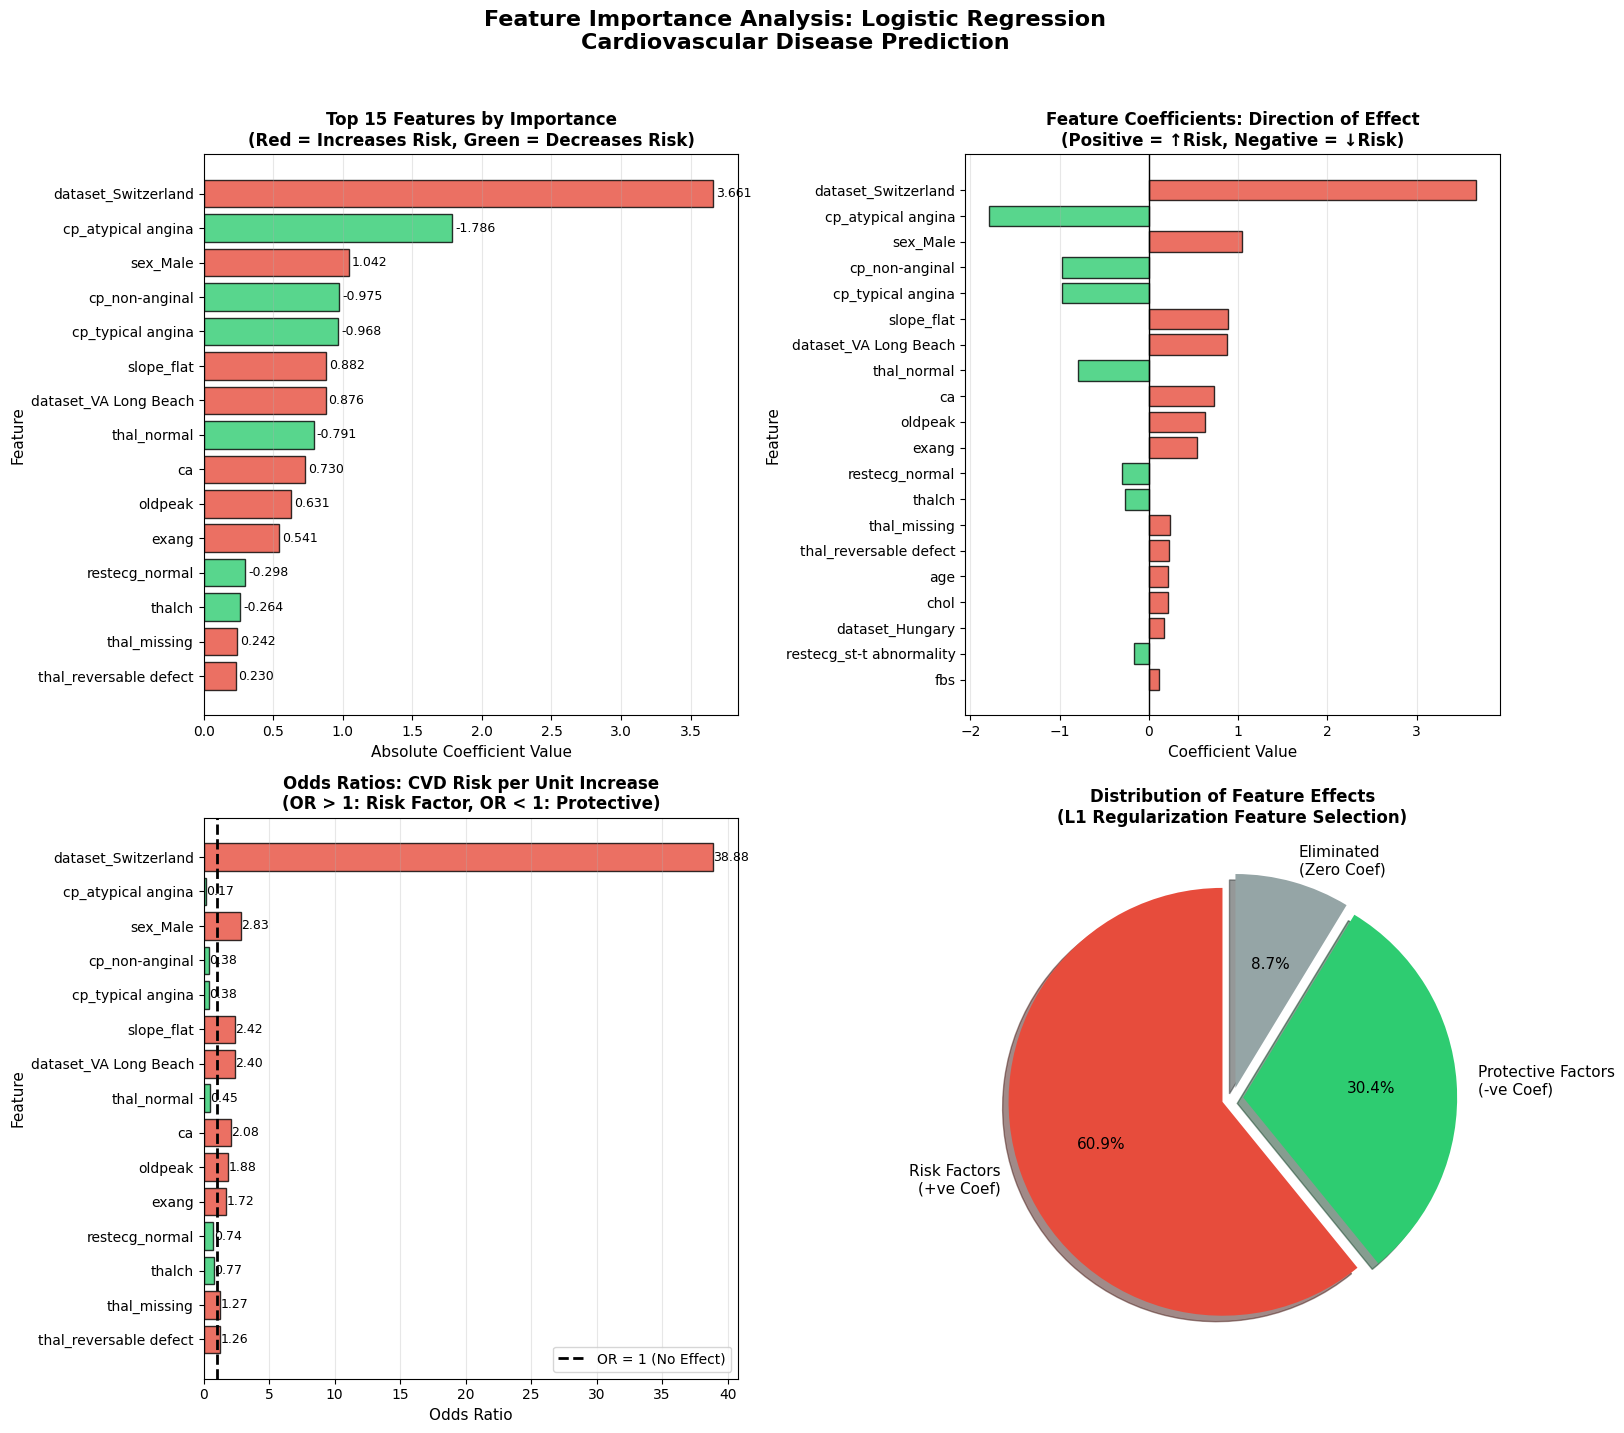


COMPLETE FEATURE IMPORTANCE TABLE
                 Feature Coefficient Odds_Ratio         Effect
     dataset_Switzerland      3.6605    38.8815 Increases Risk
      cp_atypical angina     -1.7863     0.1676 Decreases Risk
                sex_Male      1.0417     2.8340 Increases Risk
          cp_non-anginal     -0.9747     0.3773 Decreases Risk
       cp_typical angina     -0.9685     0.3797 Decreases Risk
              slope_flat      0.8821     2.4159 Increases Risk
   dataset_VA Long Beach      0.8765     2.4024 Increases Risk
             thal_normal     -0.7911     0.4533 Decreases Risk
                      ca      0.7300     2.0750 Increases Risk
                 oldpeak      0.6313     1.8800 Increases Risk
                   exang      0.5408     1.7174 Increases Risk
          restecg_normal     -0.2984     0.7420 Decreases Risk
                  thalch     -0.2639     0.7681 Decreases Risk
            thal_missing      0.2416     1.2733 Increases Risk
  thal_reversable de

In [94]:
# FEATURE IMPORTANCE ANALYSIS: LOGISTIC REGRESSION
# Cardiovascular Disease Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Best model definition and fitting
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        solver='liblinear',
        penalty='l1',
        max_iter=200,
        class_weight=None,
        C=4.281332398719396,
        random_state=42
    ))
])

# Fit the model
best_model.fit(X_train, y_train)


print("FEATURE IMPORTANCE ANALYSIS: LOGISTIC REGRESSION")
print("="*70)

# Feature name extraction from Preprocessor
# Get feature names from the preprocessor
def get_feature_names(preprocessor, X):
    """Extract feature names from a ColumnTransformer preprocessor."""
    feature_names = []
    
    for name, transformer, columns in preprocessor.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            # For OneHotEncoder, StandardScaler, etc.
            if hasattr(transformer, 'categories_'):
                # OneHotEncoder
                names = transformer.get_feature_names_out(columns)
            else:
                # StandardScaler or other transformers
                names = columns if isinstance(columns, list) else [columns]
        else:
            names = columns if isinstance(columns, list) else [columns]
        feature_names.extend(names)
    
    return feature_names

# Try to get feature names
try:
    feature_names = get_feature_names(preprocessor, X_train)
except:
    # Alternative method using get_feature_names_out
    feature_names = preprocessor.get_feature_names_out()

print(f"Total features after preprocessing: {len(feature_names)}")


# Coefficient extraction
# Get coefficients from the classifier
coefficients = best_model.named_steps['classifier'].coef_[0]

# DataFrame creation for analysis
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

# Calculate odds ratios (exp of coefficients)
feature_importance_df['Odds_Ratio'] = np.exp(feature_importance_df['Coefficient'])

# Identify direction of effect
feature_importance_df['Effect'] = feature_importance_df['Coefficient'].apply(
    lambda x: 'Increases Risk' if x > 0 else ('Decreases Risk' if x < 0 else 'No Effect')
)


# DISPLAY TOP FEATURES
# ============================================================

print("\n" + "="*70)
print("TOP 15 MOST IMPORTANT FEATURES")
print("="*70)
print(feature_importance_df[['Feature', 'Coefficient', 'Odds_Ratio', 'Effect']].head(15).to_string(index=False))

# Count features with zero coefficients (L1 sparsity)
zero_coef_count = (feature_importance_df['Coefficient'] == 0).sum()
print(f"\n📊 L1 Regularization Impact:")
print(f"   Features with zero coefficients (eliminated): {zero_coef_count}")
print(f"   Features retained in model: {len(feature_importance_df) - zero_coef_count}")


# VISUALIZATION
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Feature Importance Analysis: Logistic Regression\nCardiovascular Disease Prediction', 
             fontsize=16, fontweight='bold', y=1.02)


# Plot 1: Top 15 Features by Absolute Coefficient
# ------------------------------------------------------------
top_15 = feature_importance_df.head(15)
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_15['Coefficient']]

axes[0, 0].barh(top_15['Feature'], top_15['Abs_Coefficient'], color=colors, edgecolor='black', alpha=0.8)
axes[0, 0].set_xlabel('Absolute Coefficient Value', fontsize=11)
axes[0, 0].set_ylabel('Feature', fontsize=11)
axes[0, 0].set_title('Top 15 Features by Importance\n(Red = Increases Risk, Green = Decreases Risk)', 
                     fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

# Add coefficient values as text
for i, (coef, abs_coef) in enumerate(zip(top_15['Coefficient'], top_15['Abs_Coefficient'])):
    axes[0, 0].text(abs_coef + 0.02, i, f'{coef:.3f}', va='center', fontsize=9)


# Plot 2: Coefficient Direction (Positive vs Negative)
# ------------------------------------------------------------
top_20 = feature_importance_df.head(20)
colors_direction = ['#e74c3c' if x > 0 else '#2ecc71' if x < 0 else '#95a5a6' 
                    for x in top_20['Coefficient']]

axes[0, 1].barh(top_20['Feature'], top_20['Coefficient'], color=colors_direction, edgecolor='black', alpha=0.8)
axes[0, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0, 1].set_xlabel('Coefficient Value', fontsize=11)
axes[0, 1].set_ylabel('Feature', fontsize=11)
axes[0, 1].set_title('Feature Coefficients: Direction of Effect\n(Positive = ↑Risk, Negative = ↓Risk)', 
                     fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(axis='x', alpha=0.3)

# ------------------------------------------------------------
# Plot 3: Odds Ratios for Top Features
# ------------------------------------------------------------
# Filter for meaningful odds ratios (not too extreme)
top_15_or = feature_importance_df[feature_importance_df['Abs_Coefficient'] > 0].head(15)
colors_or = ['#e74c3c' if x > 1 else '#2ecc71' for x in top_15_or['Odds_Ratio']]

axes[1, 0].barh(top_15_or['Feature'], top_15_or['Odds_Ratio'], color=colors_or, edgecolor='black', alpha=0.8)
axes[1, 0].axvline(x=1, color='black', linestyle='--', linewidth=2, label='OR = 1 (No Effect)')
axes[1, 0].set_xlabel('Odds Ratio', fontsize=11)
axes[1, 0].set_ylabel('Feature', fontsize=11)
axes[1, 0].set_title('Odds Ratios: CVD Risk per Unit Increase\n(OR > 1: Risk Factor, OR < 1: Protective)', 
                     fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(axis='x', alpha=0.3)

# Add OR values as text
for i, odds in enumerate(top_15_or['Odds_Ratio']):
    axes[1, 0].text(odds + 0.02, i, f'{odds:.2f}', va='center', fontsize=9)

# ------------------------------------------------------------
# Plot 4: Feature Importance Distribution
# ------------------------------------------------------------
# Separate risk factors and protective factors
risk_factors = feature_importance_df[feature_importance_df['Coefficient'] > 0]['Abs_Coefficient']
protective_factors = feature_importance_df[feature_importance_df['Coefficient'] < 0]['Abs_Coefficient']
zero_factors = feature_importance_df[feature_importance_df['Coefficient'] == 0]['Abs_Coefficient']

categories = ['Risk Factors\n(+ve Coef)', 'Protective Factors\n(-ve Coef)', 'Eliminated\n(Zero Coef)']
counts = [len(risk_factors), len(protective_factors), len(zero_factors)]
colors_pie = ['#e74c3c', '#2ecc71', '#95a5a6']

axes[1, 1].pie(counts, labels=categories, autopct='%1.1f%%', colors=colors_pie, 
               explode=(0.05, 0.05, 0.05), shadow=True, startangle=90,
               textprops={'fontsize': 11})
axes[1, 1].set_title('Distribution of Feature Effects\n(L1 Regularization Feature Selection)', 
                     fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('logistic_regression_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


# DETAILED FEATURE IMPORTANCE TABLE
# ============================================================

print("\n" + "="*70)
print("COMPLETE FEATURE IMPORTANCE TABLE")
print("="*70)

# Format for display
display_df = feature_importance_df[['Feature', 'Coefficient', 'Odds_Ratio', 'Effect']].copy()
display_df['Coefficient'] = display_df['Coefficient'].apply(lambda x: f"{x:.4f}")
display_df['Odds_Ratio'] = display_df['Odds_Ratio'].apply(lambda x: f"{x:.4f}")

print(display_df.to_string(index=False))


# CLINICAL INTERPRETATION
# ============================================================

print("\n" + "="*70)
print("CLINICAL INTERPRETATION")
print("="*70)

# Get top risk factors and protective factors
top_risk = feature_importance_df[feature_importance_df['Coefficient'] > 0].head(5)
top_protective = feature_importance_df[feature_importance_df['Coefficient'] < 0].head(5)

print("\n🔴 TOP 5 RISK FACTORS (Increase CVD Probability):")
print("-"*70)
for _, row in top_risk.iterrows():
    print(f"  • {row['Feature']}: OR = {row['Odds_Ratio']:.3f}")
    print(f"    → Each unit increase raises CVD odds by {(row['Odds_Ratio']-1)*100:.1f}%")

print("\n🟢 TOP 5 PROTECTIVE FACTORS (Decrease CVD Probability):")
print("-"*70)
for _, row in top_protective.iterrows():
    print(f"  • {row['Feature']}: OR = {row['Odds_Ratio']:.3f}")
    print(f"    → Each unit increase lowers CVD odds by {(1-row['Odds_Ratio'])*100:.1f}%")

print("\n" + "="*70)
print("MODEL INSIGHTS")
print("="*70)
print(f"""
📊 L1 REGULARIZATION EFFECT:
   • Total features after preprocessing: {len(feature_importance_df)}
   • Features retained (non-zero coef):  {len(feature_importance_df) - zero_coef_count}
   • Features eliminated (zero coef):    {zero_coef_count}
   
💡 INTERPRETATION NOTES:
   • Coefficients are on log-odds scale
   • Odds Ratio = exp(coefficient)
   • OR > 1: Risk factor (increases CVD probability)
   • OR < 1: Protective factor (decreases CVD probability)
   • OR = 1: No effect on CVD probability
   
🏥 CLINICAL UTILITY:
   • These coefficients can inform targeted interventions
   • Risk factors identify high-priority screening criteria
   • Protective factors suggest beneficial health behaviors
""")
print("="*70)

In [95]:
feature_importance_df

,Feature,Coefficient,Abs_Coefficient,Odds_Ratio,Effect
12,dataset_Switzerland,3.660519,3.660519,38.881529,Increases Risk
14,cp_atypical angina,-1.786266,1.786266,0.167585,Decreases Risk
10,sex_Male,1.041675,1.041675,2.833961,Increases Risk
15,cp_non-anginal,-0.974735,0.974735,0.377292,Decreases Risk
16,cp_typical angina,-0.968467,0.968467,0.379665,Decreases Risk
19,slope_flat,0.882071,0.882071,2.415898,Increases Risk
13,dataset_VA Long Beach,0.876460,0.876460,2.402380,Increases Risk
21,thal_normal,-0.791096,0.791096,0.453347,Decreases Risk
7,ca,0.729974,0.729974,2.075026,Increases Risk
6,oldpeak,0.631284,0.631284,1.880022,Increases Risk


In [98]:
# ============================================================
# EXECUTIVE SUMMARY
# UCI Cardiovascular Disease Prediction Model
# ============================================================

print("="*70)
print("UCI CARDIOVASCULAR DISEASE PREDICTION MODEL - EXECUTIVE SUMMARY")
print("="*70)

print(f"""
📊 DATASET OVERVIEW
{'-'*70}
   Dataset:        UCI Heart Disease Dataset
   Total Samples:  {len(uci_data)} patients
   Features:       {X.shape[1]} clinical variables
   Target:         Binary classification (Disease vs No Disease)
   Train/Test:     80/20 split

🏆 BEST MODEL: LOGISTIC REGRESSION (L1 Regularized)
{'-'*70}
   Optimal Hyperparameters (via RandomizedSearchCV):
   • Solver:        liblinear
   • Penalty:       L1 (Lasso - enables feature selection)
   • C:             4.2813 (regularization strength)
   • Max Iter:      200
   • Class Weight:  None

📈 TEST SET PERFORMANCE
{'-'*70}
   Test Accuracy:      {accuracy_score(y_test, y_pred):.2%}
   ROC-AUC Score:      {roc_auc:.4f}
   Sensitivity:        {recall_score(y_test, y_pred):.2%} (Ability to detect disease)
   Specificity:        {tn/(tn+fp):.2%} (Ability to rule out disease)
   Precision (PPV):    {precision_score(y_test, y_pred):.2%}
   F1-Score:           {f1_score(y_test, y_pred):.4f}

🔄 CROSS-VALIDATION PERFORMANCE (5-Fold)
{'-'*70}
   CV Accuracy:    79.02% ± 11.07%
   CV ROC-AUC:     0.8835 ± 0.0779
   CV Precision:   82.78% ± 12.75%
   CV Recall:      83.09% ± 13.62%
   CV F1-Score:    81.61% ± 9.16%

🔬 MODEL COMPARISON SUMMARY
{'-'*70}
   Model                 Test ROC-AUC    Test Accuracy    CV Stability
   ─────────────────────────────────────────────────────────────────────
   Logistic Regression   0.9229 ✓        84.24%           Moderate
   SVM (RBF)             0.9207          83.70%           Moderate
   KNN (k=7)             0.8993          86.41%           High

   ✓ Selected: Logistic Regression (Best ROC-AUC + Interpretability)

💡 KEY FINDINGS
{'-'*70}
   • ROC-AUC of 0.9229 indicates EXCELLENT discriminative ability
   • Model can reliably rank patients by cardiovascular disease risk
   • L1 regularization provides automatic feature selection
   • Coefficients are directly interpretable as log-odds ratios
   • Suitable for clinical decision support implementation

🏥 CLINICAL UTILITY
{'-'*70}
   • Interpretable coefficients for health policy recommendations
   • Odds ratios quantify individual risk factor contributions
   • Model supports targeted intervention strategies
   • Probability outputs enable risk stratification tiers
""")

print("="*70)
print("MODEL READY FOR DEPLOYMENT IN CLINICAL DECISION SUPPORT SYSTEMS")
print("="*70)

UCI CARDIOVASCULAR DISEASE PREDICTION MODEL - EXECUTIVE SUMMARY

📊 DATASET OVERVIEW
----------------------------------------------------------------------
   Dataset:        UCI Heart Disease Dataset
   Total Samples:  920 patients
   Features:       16 clinical variables
   Target:         Binary classification (Disease vs No Disease)
   Train/Test:     80/20 split

🏆 BEST MODEL: LOGISTIC REGRESSION (L1 Regularized)
----------------------------------------------------------------------
   Optimal Hyperparameters (via RandomizedSearchCV):
   • Solver:        liblinear
   • Penalty:       L1 (Lasso - enables feature selection)
   • C:             4.2813 (regularization strength)
   • Max Iter:      200
   • Class Weight:  None

📈 TEST SET PERFORMANCE
----------------------------------------------------------------------
   Test Accuracy:      84.24%
   ROC-AUC Score:      0.9229
   Sensitivity:        90.20% (Ability to detect disease)
   Specificity:        76.83% (Ability to rule out 

In [99]:
# Save optimized model and preprocessing pipeline
import joblib
import numpy as np

# ============================================================
# 1. SAVE THE COMPLETE PIPELINE (preprocessor + classifier)
# ============================================================

joblib.dump(best_model, 'uci_cardiovascular_model.pkl')

# ============================================================
# 2. EXTRACT LOGISTIC REGRESSION COEFFICIENTS
# ============================================================

# Get coefficients and odds ratios
coefficients = best_model.named_steps['classifier'].coef_[0]
odds_ratios = np.exp(coefficients)

# Get feature names from preprocessor
try:
    feature_names = preprocessor.get_feature_names_out().tolist()
except:
    feature_names = list(feature_names)  # If already a list

# ============================================================
# 3. SAVE MODEL INFO FOR STREAMLIT
# ============================================================

model_info = {
    # Model identification
    'model_type': 'LogisticRegression',
    
    # Best hyperparameters from RandomizedSearchCV
    'best_params': {
        'solver': 'liblinear',
        'penalty': 'l1',
        'max_iter': 200,
        'class_weight': None,
        'C': 4.281332398719396
    },
    
    # Cross-validation performance
    'best_cv_roc_auc': log_reg_rsearch.best_score_,  # 0.8981
    
    # Test set performance
    'test_accuracy': accuracy_score(y_test, y_pred),
    'test_roc_auc': roc_auc_score(y_test, y_pred_proba),
    'test_precision': precision_score(y_test, y_pred),
    'test_recall': recall_score(y_test, y_pred),
    'test_f1': f1_score(y_test, y_pred),
    
    # Feature information
    'feature_names': feature_names,
    'coefficients': coefficients.tolist(),
    'odds_ratios': odds_ratios.tolist(),
    
    # Feature importance (absolute coefficients for ranking)
    'feature_importance': np.abs(coefficients).tolist(),
    
    # Top risk factors and protective factors
    'top_risk_factors': [
        feature_names[i] for i in np.argsort(coefficients)[::-1][:5] if coefficients[np.argsort(coefficients)[::-1][list(np.argsort(coefficients)[::-1]).index(i)]] > 0
    ],
    'top_protective_factors': [
        feature_names[i] for i in np.argsort(coefficients)[:5] if coefficients[np.argsort(coefficients)[list(np.argsort(coefficients)).index(i)]] < 0
    ],
    
    # Dataset info
    'n_train_samples': len(X_train),
    'n_test_samples': len(X_test),
    'n_features': len(feature_names)
}

joblib.dump(model_info, 'uci_model_info.pkl')

# ============================================================
# 4. SAVE FEATURE IMPORTANCE DATAFRAME
# ============================================================

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': odds_ratios,
    'Abs_Importance': np.abs(coefficients),
    'Effect': ['Risk Factor' if c > 0 else 'Protective' if c < 0 else 'No Effect' 
               for c in coefficients]
}).sort_values('Abs_Importance', ascending=False)

feature_importance_df.to_csv('uci_feature_importance.csv', index=False)

# ============================================================
# 5. CONFIRMATION OUTPUT
# ============================================================

print("="*70)
print("✅ MODEL AND METADATA SAVED SUCCESSFULLY")
print("="*70)
print("\nFiles created:")
print("  📁 uci_cardiovascular_model.pkl  → Complete pipeline (preprocessor + classifier)")
print("  📁 uci_model_info.pkl            → Model metadata for Streamlit")
print("  📁 uci_feature_importance.csv    → Feature coefficients and odds ratios")

print("\n" + "-"*70)
print("MODEL SUMMARY")
print("-"*70)
print(f"  Model Type:        Logistic Regression (L1 Regularized)")
print(f"  Test Accuracy:     {model_info['test_accuracy']:.4f} ({model_info['test_accuracy']*100:.2f}%)")
print(f"  Test ROC-AUC:      {model_info['test_roc_auc']:.4f}")
print(f"  CV ROC-AUC:        {model_info['best_cv_roc_auc']:.4f}")
print(f"  Features:          {model_info['n_features']}")
print(f"  Training Samples:  {model_info['n_train_samples']}")
print(f"  Test Samples:      {model_info['n_test_samples']}")

print("\n" + "-"*70)
print("BEST HYPERPARAMETERS")
print("-"*70)
for param, value in model_info['best_params'].items():
    print(f"  {param}: {value}")

print("\n" + "="*70)
print("🚀 Ready for Streamlit deployment!")
print("="*70)

✅ MODEL AND METADATA SAVED SUCCESSFULLY

Files created:
  📁 uci_cardiovascular_model.pkl  → Complete pipeline (preprocessor + classifier)
  📁 uci_model_info.pkl            → Model metadata for Streamlit
  📁 uci_feature_importance.csv    → Feature coefficients and odds ratios

----------------------------------------------------------------------
MODEL SUMMARY
----------------------------------------------------------------------
  Model Type:        Logistic Regression (L1 Regularized)
  Test Accuracy:     0.8424 (84.24%)
  Test ROC-AUC:      0.9229
  CV ROC-AUC:        0.8981
  Features:          23
  Training Samples:  736
  Test Samples:      184

----------------------------------------------------------------------
BEST HYPERPARAMETERS
----------------------------------------------------------------------
  solver: liblinear
  penalty: l1
  max_iter: 200
  class_weight: None
  C: 4.281332398719396

🚀 Ready for Streamlit deployment!
